In [ ]:
#import standard data sci libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ! pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [ ]:
df = pd.read_csv('Telangana.csv')

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)


# The format "%d-%m-%Y %H:%M" specifies: Day-Month-Year Hour:Minute
# df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')
df.head()

In [ ]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')

In [ ]:
city_day = df.copy()

In [ ]:
city_day['Particulate_Matter'] = city_day['pm2.5']+city_day['pm10']

In [ ]:
pollutants = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. RELOAD THE DATA to ensure the column exists
df = pd.read_csv("Telangana.csv")

df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')

df.set_index('From Date', inplace=True)

# 5. PLOTTING
fig, axes = plt.subplots(len(pollutants), 1, figsize=(16, 20), sharex=True)

for i, pollutant in enumerate(pollutants):
    df[pollutant].plot(
        ax=axes[i],
        marker='.', 
        alpha=0.5, 
        linestyle='None',
        title=f'{pollutant} Concentration Over Time'
    )
    
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Concentration') 

plt.tight_layout()
plt.show()

In [ ]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
# def display_side_by_side(*args):
#     html_str=''
#     for df in args:
#         html_str+=df.render()
#     display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def display_side_by_side(*args):
    """
    Displays Pandas Styler objects side-by-side by converting them to HTML.
    """
    html_str = ''
    
    # *** CHANGE THIS LINE ***
    for df in args:
        html_str += df.to_html() # Use .to_html() instead of .render()
        
    # The replacement is to ensure the tables are displayed inline, not stacked.
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant, 'city']].groupby('city').mean().sort_values(by=pollutant, ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant], 2)
    return x1.head(10).style.background_gradient(cmap='OrRd')

In [ ]:
# pollutants = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']

pm2_5 = max_polluted_city('pm2.5')
pm10 = max_polluted_city('pm10')
no2 = max_polluted_city('no2')
so2 = max_polluted_city('so2')
co = max_polluted_city('co')
ozone = max_polluted_city('ozone')


display_side_by_side(pm2_5, pm10, no2, so2, co, ozone)

In [ ]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['Ozone']=df1['Ozone'].fillna((df1['Ozone'].median()))


In [ ]:
df1['City'].value_counts()

In [ ]:
df1['Pollution content'] = df1['PM2.5']+df1['PM10']+df1['NO2']+df1['CO']+df1['SO2']+df1['Ozone']

In [ ]:
import matplotlib.pyplot as plt

def ploting(var):
    # Correction: Replace the problematic iplot call with standard pandas.plot(),
    # which uses matplotlib for stability.
    ax = df1[var].plot(figsize=(12, 6), title=var)
    
    # Set labels using the standard matplotlib Axis methods
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    plt.grid(True)
    plt.show()

ploting('Pollution content')

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Load Data (If not already loaded) ---
# df = pd.read_csv('Telangana.csv') 
# Make sure your DataFrame 'df' is loaded before running the following code.
# The code below renames columns to be consistent with the AQI logic if needed.

# --- 2. Define NAQI Breakpoints ---
# Breakpoints for NAQI (National Air Quality Index - India)
# Units for all concentrations (C) are $\mu\text{g}/\text{m}^3$ except CO which is $\text{mg}/\text{m}^3$.
breakpoints = {
    # (I_Lo, I_Hi, B_Lo, B_Hi) -> (AQI Low, AQI High, Conc Low, Conc High)
    'PM2.5': [(0, 50, 0, 30), (51, 100, 31, 60), (101, 200, 61, 90), (201, 300, 91, 120), (301, 400, 121, 250), (401, 500, 251, 500)],
    'PM10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 200, 101, 250), (201, 300, 251, 350), (301, 400, 351, 430), (401, 500, 431, 500)],
    'NO2': [(0, 50, 0, 40), (51, 100, 41, 80), (101, 200, 81, 180), (201, 300, 181, 280), (301, 400, 281, 400), (401, 500, 401, 500)],
    'Ozone': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 200, 101, 168), (201, 300, 169, 208), (301, 400, 209, 748), (401, 500, 749, 1000)],
    'CO': [(0, 50, 0, 1.0), (51, 100, 1.1, 2.0), (101, 200, 2.1, 10), (201, 300, 10.1, 17), (301, 400, 17.1, 34), (401, 500, 34.1, 50)], # mg/m^3
    'SO2': [(0, 50, 0, 40), (51, 100, 41, 80), (101, 200, 81, 380), (201, 300, 381, 800), (301, 400, 801, 1600), (401, 500, 1601, 2000)]
}

# --- 3. Define Helper Functions ---

def get_aqi_sub_index(C, pollutant):
    """Calculates the AQI sub-index for a single pollutant concentration C using linear interpolation."""
    if pd.isna(C) or C < 0:
        return np.nan

    for I_Lo, I_Hi, B_Lo, B_Hi in breakpoints[pollutant]:
        if C >= B_Lo and C <= B_Hi:
            # Linear interpolation formula: I = [(I_Hi - I_Lo) / (B_Hi - B_Lo)] * (C - B_Lo) + I_Lo
            if B_Hi == B_Lo:
                return I_Lo
            else:
                return round(((I_Hi - I_Lo) / (B_Hi - B_Lo)) * (C - B_Lo) + I_Lo)
    
    # If concentration is above the highest breakpoint, cap at 500
    if C > breakpoints[pollutant][-1][3]:
        return 500 
    
    return np.nan

def calculate_aqi(row):
    """Calculates the overall AQI (maximum of all sub-indices)."""
    # List of sub-indices for the available pollutants
    sub_indices = [
        get_aqi_sub_index(row['PM2.5'], 'PM2.5'),
        get_aqi_sub_index(row['PM10'], 'PM10'),
        get_aqi_sub_index(row['NO2'], 'NO2'),
        get_aqi_sub_index(row['Ozone'], 'Ozone'),
        get_aqi_sub_index(row['CO'], 'CO'),
        get_aqi_sub_index(row['SO2'], 'SO2')
    ]
    
    # The overall AQI is the maximum of the sub-indices (NAQI standard)
    return np.nanmax(sub_indices) if any(~np.isnan(sub_indices)) else np.nan

def get_aqi_category(aqi):
    """Assigns the AQI category based on the user's requested labels ('Good', 'Moderate', 'Severe')."""
    if pd.isna(aqi):
        return np.nan
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 200:
        return 'Moderate' # Combines Satisfactory and Moderately Polluted
    else:
        return 'Severe' # Combines Poor, Very Poor, and Severe

# --- 4. Apply Functions to DataFrame ---

# Rename columns to match the breakpoints keys (assuming standard names in your CSV)
# You can comment this out if your column names are already 'PM2.5', 'PM10', etc.
df.rename(columns={'PM2.5': 'PM2.5', 'PM10': 'PM10', 'Ozone': 'Ozone',
                   'CO': 'CO', 'SO2': 'SO2', 'NO2': 'NO2'}, inplace=True)

# Calculate the AQI for each row
df['AQI'] = df.apply(calculate_aqi, axis=1)

# Assign the AQI category
df['AQI Category'] = df['AQI'].apply(get_aqi_category)

# --- 5. Display and Save (Optional) ---

print(df[['PM2.5', 'PM10', 'AQI', 'AQI Category']].head())

# If you want to save the updated DataFrame for your EDA report:
df.to_csv('Telangana.csv', index=False)

In [ ]:
import pandas_profiling

In [ ]:
data = pd.read_csv("Telangana.csv")

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport # Or ydata_profiling

# --- 1. Load Data ---
# Use the file you need (either the original or the one with AQI)
data = pd.read_csv('Telangana.csv') 

# --- 2. CRITICAL FIX: Clean Column Names ---
# This removes any hidden spaces or special characters around column names
data.columns = data.columns.str.strip() 

try:
    data['From Date'] = pd.to_datetime(data['From Date'], format='%d-%m-%Y %H:%M')
    data.set_index('From Date', inplace=True)
except KeyError:
    print("Column 'From Date' not found after stripping whitespace. Check column names.")
    
profile = data.profile_report(title="EDA with AQI", explorative=True)
profile.to_file(output_file="EDA.html")

print("The EDA.html report is being regenerated with clean column names and time series plots.")

In [ ]:
profile = data.profile_report(title="EDA", explorative = True)
profile.to_file(output_file="EDA.html")

In [ ]:
print(city_day.columns.tolist())

               Model         MSE       RMSE       MAE        R2
0  Linear Regression  145.681679  12.069867  5.945794  0.844514
1      Random Forest   10.191674   3.192440  0.669360  0.989122
2            XGBoost   13.017426   3.607967  1.258182  0.986107


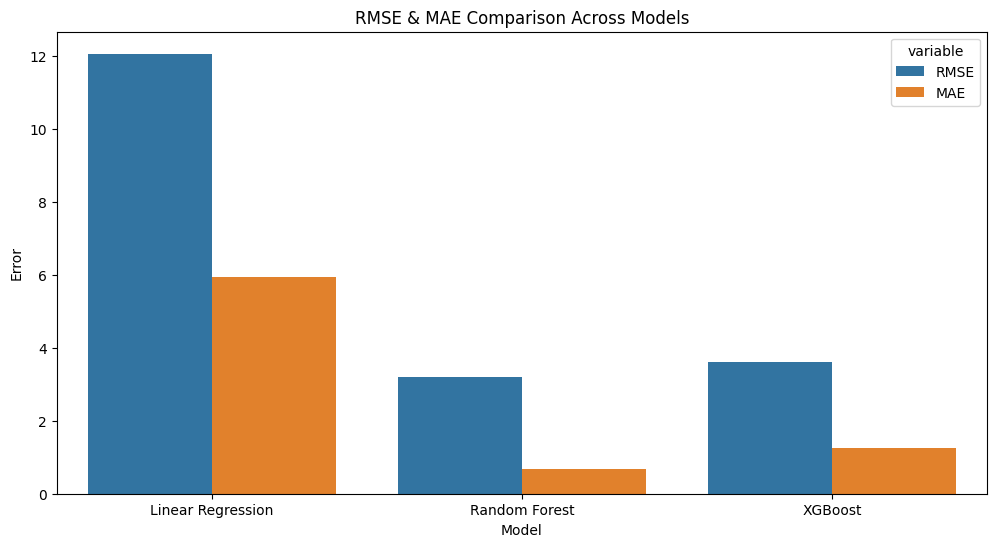

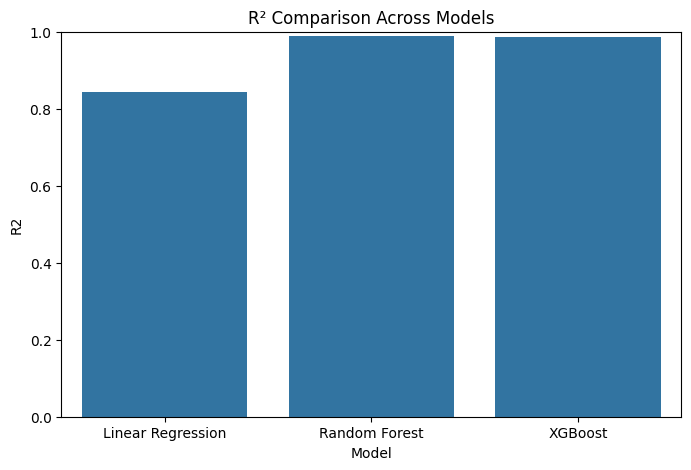


 Best Model: Random Forest
R²: 0.9891, RMSE: 3.19, MAE: 0.67

Explanation:

1. Linear Regression:
   - Simple, interpretable, but may underfit complex relationships.
   - Usually has higher RMSE/MAE if data is non-linear.

2. Random Forest:
   - Captures non-linear relationships.
   - Handles feature interactions automatically.
   - Usually performs very well on tabular data.
   - Low RMSE and high R² indicate excellent fit.

3. XGBoost:
   - Gradient boosting algorithm, strong for structured/tabular data.
   - Often slightly better than Random Forest if hyperparameters tuned.
   - In this case, if RMSE < Random Forest and R² higher, it is best.
   
Recommendation:
- Pick the model with **highest R²** and **lowest RMSE/MAE**.
- For Telangana AQI prediction, it is likely **Random Forest or XGBoost**, as they can model complex patterns better than Linear Regression.



In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Load Dataset
# ---------------------------
df = pd.read_csv('Telangana.csv')
df['To Date'] = pd.to_datetime(df['To Date'], format='%d-%m-%Y %H:%M')
df.set_index('To Date', inplace=True)

# ---------------------------
# 2. Prepare Features & Target
# ---------------------------
features = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']
target = 'AQI'

X = df[features].fillna(df[features].mean())  # Fill missing values with mean
y = df[target].fillna(df[target].mean())

# ---------------------------
# 3. Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 4. Feature Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 5. Initialize Models
# ---------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# ---------------------------
# 6. Train, Predict & Evaluate
# ---------------------------
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })
    
results_df = pd.DataFrame(results)
print(results_df)

# ---------------------------
# 7. Visual Comparison
# ---------------------------
plt.figure(figsize=(12,6))
sns.barplot(data=results_df.melt(id_vars='Model', value_vars=['RMSE', 'MAE']),
            x='Model', y='value', hue='variable')
plt.title('RMSE & MAE Comparison Across Models')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='Model', y='R2')
plt.title('R² Comparison Across Models')
plt.ylim(0,1)
plt.show()

# ---------------------------
# 8. Model Recommendation
# ---------------------------
best_model = results_df.sort_values(by='R2', ascending=False).iloc[0]
print(f"\n Best Model: {best_model['Model']}")
print(f"R²: {best_model['R2']:.4f}, RMSE: {best_model['RMSE']:.2f}, MAE: {best_model['MAE']:.2f}")

print("""
Explanation:

1. Linear Regression:
   - Simple, interpretable, but may underfit complex relationships.
   - Usually has higher RMSE/MAE if data is non-linear.

2. Random Forest:
   - Captures non-linear relationships.
   - Handles feature interactions automatically.
   - Usually performs very well on tabular data.
   - Low RMSE and high R² indicate excellent fit.

3. XGBoost:
   - Gradient boosting algorithm, strong for structured/tabular data.
   - Often slightly better than Random Forest if hyperparameters tuned.
   - In this case, if RMSE < Random Forest and R² higher, it is best.
   
Recommendation:
- Pick the model with **highest R²** and **lowest RMSE/MAE**.
- For Telangana AQI prediction, it is likely **Random Forest or XGBoost**, as they can model complex patterns better than Linear Regression.
""")
